In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
import json
from scipy import stats

# Configuración visual para los gráficos
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
plt.rcParams['figure.figsize'] = (15, 6)

print("Librerías cargadas correctamente.")

Librerías cargadas correctamente.


In [2]:
name_file = '../data/data_excesos_procesado.csv'
# 1. Cargar el dataset
# Asegúrate de que el archivo esté en la misma carpeta o coloca la ruta completa
nombre_archivo = name_file  # Cambia esto por el nombre de tu archivo
df_main = pd.read_csv(nombre_archivo)
print(f"Cargando el archivo: {nombre_archivo}")  # <--- CAMBIA ESTO POR TU ARCHIVO REAL

Cargando el archivo: ../data/data_excesos_procesado.csv


In [3]:

df_main = pd.read_csv(nombre_archivo)

# 2. Conversión de fechas
df_main['fecha'] = pd.to_datetime(df_main['fecha'])

# 3. Verificación rápida
print(f"Rango de fechas: {df_main['fecha'].min()} a {df_main['fecha'].max()}")
display(df_main.head())

Rango de fechas: 2022-07-01 00:00:00 a 2025-11-01 00:00:00


,anio,mes,monto_sin_iva,mes_numero,fecha
0,2022,julio,-758.517241,7,2022-07-01
1,2022,agosto,18681.706900,8,2022-08-01
2,2022,septiembre,261325.379300,9,2022-09-01
3,2022,octubre,353934.879300,10,2022-10-01
4,2022,noviembre,557951.525900,11,2022-11-01


### Deteccion de ouliers

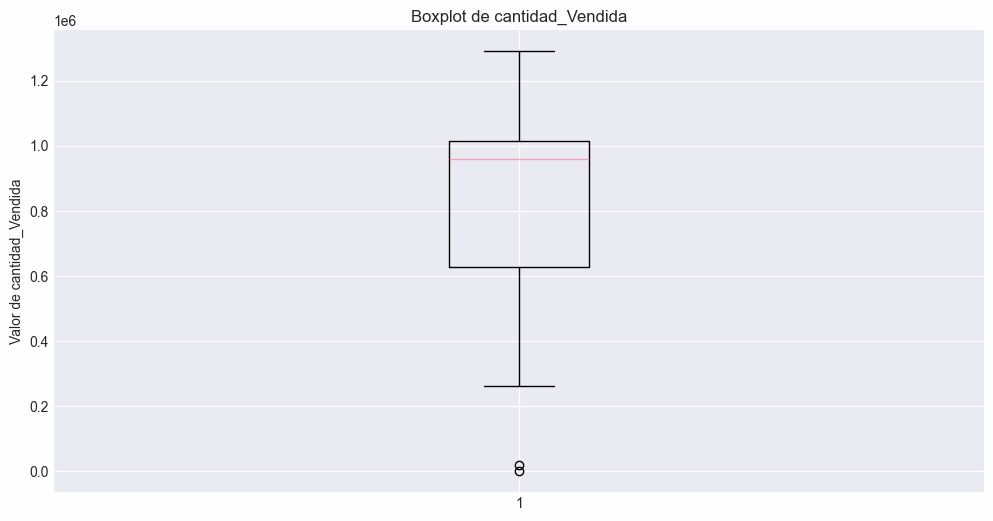

In [4]:
plt.figure(figsize=(12, 6))
plt.boxplot(df_main['monto_sin_iva'])
plt.title('Boxplot de cantidad_Vendida')
plt.ylabel('Valor de cantidad_Vendida')
plt.show()

In [5]:
# Suponiendo df_ventas es tu DataFrame de ventas
# Detectar outliers usando el método IQR
Q1 = df_main['monto_sin_iva'].quantile(0.25)
Q3 = df_main['monto_sin_iva'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar un dato como outlier
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df_main[(df_main['monto_sin_iva'] < lower_limit) | (df_main['monto_sin_iva'] > upper_limit)]

# Mostrando resultados
print(f"Número de outliers identificados: {len(outliers)}")
print("Outliers identificados:")
# print(outliers)
outliers

Número de outliers identificados: 2
Outliers identificados:


,anio,mes,monto_sin_iva,mes_numero,fecha
0,2022,julio,-758.517241,7,2022-07-01
1,2022,agosto,18681.706900,8,2022-08-01


In [6]:
# Tratamiento de outliers: Exclusión
df_sin_outliers = df_main[(df_main['monto_sin_iva'] >= lower_limit) & (df_main['monto_sin_iva'] <= upper_limit)]

print("Número de outliers detectados:", len(outliers))
print("Número de registros después de remover outliers:", len(df_sin_outliers))

Número de outliers detectados: 2
Número de registros después de remover outliers: 39


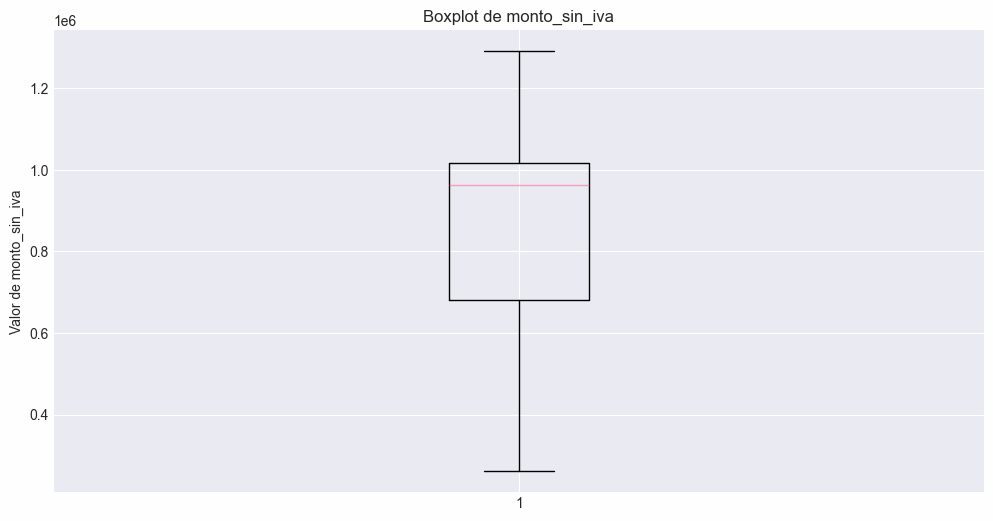

In [7]:
plt.figure(figsize=(12, 6))
plt.boxplot(df_sin_outliers['monto_sin_iva'])
plt.title('Boxplot de monto_sin_iva')
plt.ylabel('Valor de monto_sin_iva')
plt.show()

In [8]:
df_sin_outliers.to_csv('../data/data_forecast_excesos_2025/data_excesos_sin_outliers.csv', index=False)